In [4]:
import tensorflow as tf
import matplotlib.pylab as plt

## Creating Data to view and fit

In [14]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

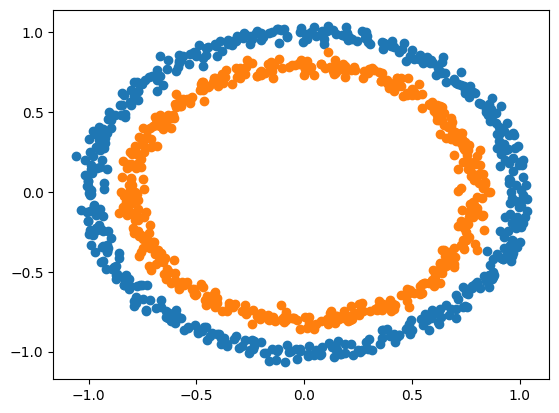

In [15]:
class1 = X[y == 0]
class2 = X[y == 1]
class1.shape

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])

In [16]:
X_train = tf.constant(X)
y_train = tf.constant(y)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.binary_accuracy],
)

history = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.7105 - binary_accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7038 - binary_accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7000 - binary_accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6974 - binary_accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - binary_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6929 - binary_accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - binary_accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6888 - binary_accuracy: 0.5140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6871 - binary_accuracy: 0.5180
Epoch 10/100
32/32 [==========================

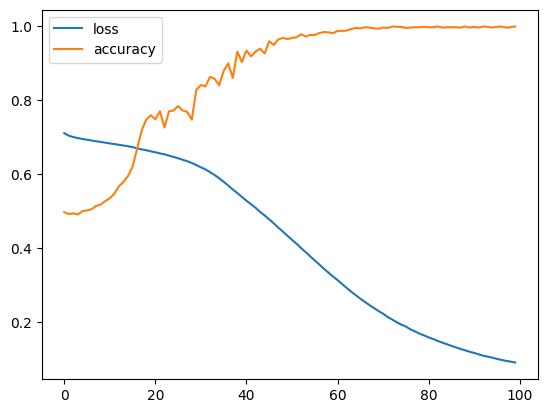

In [34]:
loss = history.history["loss"]
acc = history.history["binary_accuracy"]

plt.plot(history.epoch, loss, label="loss")
plt.plot(history.epoch, acc, label="accuracy")
plt.legend()

In [35]:
import numpy as np

def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:,0].min() -.1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() -.1, X[:,1].max() + .1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 963us/step


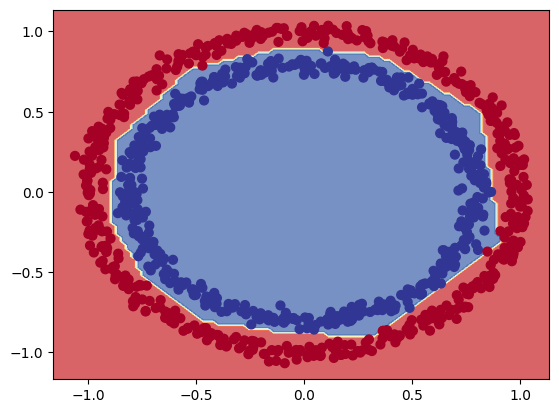

In [36]:
plot_decision_boundary(model, X, y)